In [2]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [3]:
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

In [4]:
file_path = Path("Starter_Code/Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

In [5]:
## Calculate the mean number of housing units per year (hint: use groupby) 
sfo_data_housing = (sfo_data["housing_units"].groupby("year").mean())
sfo_data_housing


year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

Text(0, 0.5, 'Housing Units')

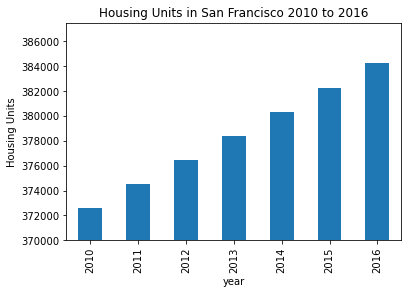

In [6]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

sfo_data_housing_mean = sfo_data_housing.plot(title="Housing Units in San Francisco 2010 to 2016", kind="bar", y="Housing Units",)
sfo_data_housing_ylim = sfo_data_housing_mean.set_ylim((370000,387500))
sfo_data_housing_mean.set_ylabel("Housing Units")


In [7]:
# Calculate the average gross rent and average sale price per square foot
sfo_data_gross = sfo_data[["sale_price_sqr_foot","gross_rent"]].groupby("year").mean()
sfo_data_gross.head()

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528


Text(0.5, 0, 'Year')

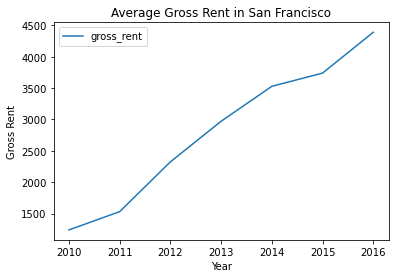

In [8]:
sfo_data_gross_plot = sfo_data_gross.plot(title="Average Gross Rent in San Francisco", kind="line", y="gross_rent")
sfo_data_gross_plot.set_ylabel("Gross Rent")
sfo_data_gross_plot.set_xlabel("Year")

Text(0.5, 17.200000000000003, 'Year')

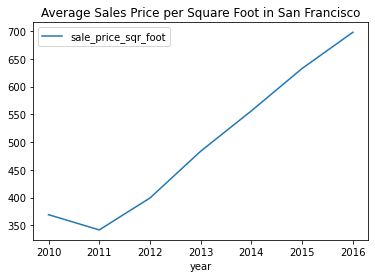

In [9]:
#Average Sale Price per Square Foot
sfo_avg_sale_plot = sfo_data_gross.plot(title="Average Sales Price per Square Foot in San Francisco", kind="line", y="sale_price_sqr_foot")
sfo_data_gross_plot.set_ylabel("Avg. Sales Price")
sfo_data_gross_plot.set_xlabel("Year")

In [19]:
#change index and set with new variable
sfo_data.reset_index(inplace=True)

ValueError: cannot insert level_0, already exists

In [52]:
sfo_data_neighborhood = sfo_data.groupby("neighborhood")

In [54]:
sfo_data_year = sfo_data.groupby("year")

In [59]:
sfo_data_neighborhood.mean()

,year,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,,
Alamo Square,2013.000000,366.020712,378401.00,2817.285714
Anza Vista,2013.333333,373.382198,379050.00,3031.833333
Bayview,2012.000000,204.588623,376454.00,2318.400000
Bayview Heights,2015.000000,590.792839,382295.00,3739.000000
Bernal Heights,2013.500000,576.746488,379374.50,3080.333333
...,...,...,...,...
West Portal,2012.250000,498.488485,376940.75,2515.500000
Western Addition,2012.500000,307.562201,377427.50,2555.166667
Westwood Highlands,2012.000000,533.703935,376454.00,2250.500000
